In [ ]:
!pip install -U finance-datareader

##1. 데이터 로드

In [ ]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = fdr.DataReader('005930', '2018-05-04', '2020-01-22')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-05-04,53000,53900,51800,51900,39565391,-0.020755
2018-05-08,52600,53200,51900,52600,23104720,0.013487
2018-05-09,52600,52800,50900,50900,16128305,-0.032319
2018-05-10,51700,51700,50600,51600,13905263,0.013752
2018-05-11,52000,52200,51200,51300,10314997,-0.005814


In [ ]:
print(df.shape)

(421, 6)


## 2. 데이터 전처리 - MinMaxScaler

숫자 단위가 클수록 계산에 소요되는 시간이 늘어남  
==> 시간 소요를 줄이기 위해 MinMaxScaler를 적용

In [ ]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [ ]:
dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx

,Open,High,Low,Volume
Date,,,,
2018-05-04,0.633401,0.646825,0.601610,0.595060
2018-05-08,0.617108,0.619048,0.605634,0.316465
2018-05-09,0.617108,0.603175,0.565392,0.198390
2018-05-10,0.580448,0.559524,0.553320,0.160765
2018-05-11,0.592668,0.579365,0.577465,0.100000
...,...,...,...,...
2020-01-16,0.881874,0.916667,0.891348,0.168830
2020-01-17,0.995927,0.968254,0.971831,0.196653
2020-01-20,1.000000,1.000000,1.000000,0.137469


In [ ]:
dfx.describe()

,Open,High,Low,Volume
count,421.000000,421.000000,421.000000,421.000000
mean,0.372409,0.374434,0.373457,0.117439
std,0.175834,0.171931,0.171432,0.084973
min,0.000000,0.000000,0.000000,0.000000
25%,0.262729,0.267857,0.269618,0.064016
50%,0.350305,0.349206,0.352113,0.101418
75%,0.443992,0.452381,0.444668,0.146095
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
dfy.head()

,Close
Date,
2018-05-04,0.579158
2018-05-08,0.607214
2018-05-09,0.539078
2018-05-10,0.567134
2018-05-11,0.555110


In [ ]:
# 두 데이터를 리스트 형태로 저장
X = dfx.values.tolist()
y = dfy.values.tolist()

## 3. 데이터 전처리 - 10일 동안의 OHLVC 데이터로 다음 날의 종가 예측

In [ ]:
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.7637474541720417, 0.7857142857111677, 0.7665995975824281, 0.323174686971615], [0.8533604887948947, 0.8333333333300265, 0.8269617706204146, 0.33335345138624783], [0.8696537678172315, 0.8769841269806469, 0.8631790744432065, 0.19622106804249292], [0.9022403258619053, 0.8888888888853615, 0.8953722333967993, 0.117672127572782], [0.9348268839065791, 0.9285714285677438, 0.927565392350392, 0.21155713424914332], [0.898167006106321, 0.8730158730124087, 0.8873239436584011, 0.1674615836301646], [0.8818737270839841, 0.9166666666630291, 0.8913480885276002, 0.16882989330989187], [0.9959266802403425, 0.968253968250126, 0.9718309859115821, 0.19665250042066781], [0.9999999999959267, 0.9999999999960317, 0.9999999999959758, 0.13746944253371812], [0.9999999999959267, 0.9841269841230789, 0.9798792756499803, 0.11400880277083453]] -> [0.9959919839639438]


In [ ]:
# 10일간의 OHLVC 데이터
data_X[0]

[[0.6334012219933466,
  0.64682539682283,
  0.6016096579452651,
  0.5950598479352758],
 [0.6171079429710097,
  0.6190476190451625,
  0.6056338028144642,
  0.3164647972944813],
 [0.6171079429710097,
  0.6031746031722096,
  0.5653923541224732,
  0.19838973885875907],
 [0.5804480651707518,
  0.5595238095215892,
  0.5533199195148759,
  0.16076499691679247],
 [0.5926680244375044,
  0.5793650793627803,
  0.5774647887300706,
  0.10000013878410015],
 [0.5519348268816622,
  0.5357142857121598,
  0.5251509054304823,
  0.17775773908379244],
 [0.5193482688369884,
  0.5079365079344923,
  0.4929577464768895,
  0.24207018961868487],
 [0.47861507128114616,
  0.49999999999801586,
  0.49496981891148906,
  0.19484190950809502],
 [0.5234215885925726,
  0.5119047619027305,
  0.5050301810844868,
  0.100853881024588],
 [0.5071283095702357,
  0.4880952380933012,
  0.5030181086498873,
  0.03892790771899896]]

In [ ]:
# data_X[0]을 넣었을 때의 정답인 data_y[0]
data_y[0]

[0.503006012022032]

## 4. 훈련 데이터, 테스트 데이터 분리

In [ ]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))

전체 데이터의 크기 : 411 411


In [ ]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (287, 10, 4) (287, 1)
테스트 데이터의 크기 : (124, 10, 4) (124, 1)


## 5. 모델 학습 - Tensorflow

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 20)            2000      
                                                                 
 dropout_2 (Dropout)         (None, 10, 20)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5301 (20.71 KB)
Trainable params: 5301 (20.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)

Epoch 1/70
10/10 [==============================] - 3s 9ms/step - loss: 0.0848
Epoch 2/70
10/10 [==============================] - 0s 9ms/step - loss: 0.0401
Epoch 3/70
10/10 [==============================] - 0s 9ms/step - loss: 0.0093
Epoch 4/70
10/10 [==============================] - 0s 9ms/step - loss: 0.0086
Epoch 5/70
10/10 [==============================] - 0s 9ms/step - loss: 0.0056
Epoch 6/70
10/10 [==============================] - 0s 10ms/step - loss: 0.0058
Epoch 7/70
10/10 [==============================] - 0s 9ms/step - loss: 0.0052
Epoch 8/70
10/10 [==============================] - 0s 9ms/step - loss: 0.0049
Epoch 9/70
10/10 [==============================] - 0s 9ms/step - loss: 0.0047
Epoch 10/70
10/10 [==============================] - 0s 19ms/step - loss: 0.0050
Epoch 11/70
10/10 [==============================] - 0s 11ms/step - loss: 0.0043
Epoch 12/70
10/10 [==============================] - 0s 16ms/step - loss: 0.0048
Epoch 13/70
10/10 [==========================

In [ ]:
pred_y = model.predict(test_X)
pred_y

4/4 [==============================] - 0s 4ms/step


array([[0.35822886],
       [0.36569872],
       [0.36534563],
       [0.36794692],
       [0.36870578],
       [0.36629093],
       [0.3628562 ],
       [0.35556749],
       [0.33897656],
       [0.31754613],
       [0.2953381 ],
       [0.2645397 ],
       [0.24947624],
       [0.23752612],
       [0.23562291],
       [0.24539706],
       [0.2564615 ],
       [0.26743978],
       [0.2726733 ],
       [0.27675134],
       [0.2802011 ],
       [0.28532922],
       [0.28878865],
       [0.28553608],
       [0.27326983],
       [0.2659372 ],
       [0.26855654],
       [0.27148464],
       [0.2755804 ],
       [0.28312305],
       [0.27999288],
       [0.27216545],
       [0.27749836],
       [0.29406685],
       [0.31486845],
       [0.32876864],
       [0.3407585 ],
       [0.35234258],
       [0.36108488],
       [0.36988652],
       [0.38383487],
       [0.40025356],
       [0.41236538],
       [0.4222533 ],
       [0.43092954],
       [0.43670487],
       [0.43019983],
       [0.427

## 5. 모델 학습 - Pytorch

In [ ]:
import torch
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.dropout = nn.Dropout(0.1)
        self.fc1 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.dropout(out)
        out = self.fc1(out[:, -1, :])  # LSTM의 마지막 타임스텝만 사용

        return out

# 모델 생성
input_size = 4
hidden_size = 20
num_layers = 2
output_size = 1

model = LSTMModel(input_size, hidden_size, num_layers, output_size)

# 손실 함수와 옵티마이저 정의
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 훈련 데이터를 PyTorch 텐서로 변환
train_X_tensor = torch.tensor(train_X, dtype=torch.float32)
train_y_tensor = torch.tensor(train_y, dtype=torch.float32)

# 훈련
num_epochs = 70
batch_size = 30
for epoch in range(num_epochs):
    for i in range(0, len(train_X_tensor), batch_size):
        inputs = train_X_tensor[i:i+batch_size]
        targets = train_y_tensor[i:i+batch_size]

        # 순전파
        outputs = model(inputs)

        # 손실 계산
        loss = criterion(outputs, targets)

        # 역전파 및 최적화
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 테스트 데이터를 PyTorch 텐서로 변환
test_X_tensor = torch.tensor(test_X, dtype=torch.float32)

# 예측
with torch.no_grad():
    pred_y_tensor = model(test_X_tensor)

# 예측 결과를 NumPy 배열로 변환
pred_y = pred_y_tensor.numpy()


Epoch [1/70], Loss: 0.1977
Epoch [2/70], Loss: 0.0868
Epoch [3/70], Loss: 0.0136
Epoch [4/70], Loss: 0.0066
Epoch [5/70], Loss: 0.0044
Epoch [6/70], Loss: 0.0078
Epoch [7/70], Loss: 0.0041
Epoch [8/70], Loss: 0.0051
Epoch [9/70], Loss: 0.0091
Epoch [10/70], Loss: 0.0024
Epoch [11/70], Loss: 0.0064
Epoch [12/70], Loss: 0.0038
Epoch [13/70], Loss: 0.0015
Epoch [14/70], Loss: 0.0083
Epoch [15/70], Loss: 0.0030
Epoch [16/70], Loss: 0.0047
Epoch [17/70], Loss: 0.0069
Epoch [18/70], Loss: 0.0020
Epoch [19/70], Loss: 0.0023
Epoch [20/70], Loss: 0.0023
Epoch [21/70], Loss: 0.0048
Epoch [22/70], Loss: 0.0038
Epoch [23/70], Loss: 0.0039
Epoch [24/70], Loss: 0.0045
Epoch [25/70], Loss: 0.0038
Epoch [26/70], Loss: 0.0032
Epoch [27/70], Loss: 0.0012
Epoch [28/70], Loss: 0.0052
Epoch [29/70], Loss: 0.0045
Epoch [30/70], Loss: 0.0039
Epoch [31/70], Loss: 0.0031
Epoch [32/70], Loss: 0.0044
Epoch [33/70], Loss: 0.0035
Epoch [34/70], Loss: 0.0022
Epoch [35/70], Loss: 0.0026
Epoch [36/70], Loss: 0.0074
E

In [ ]:
pred_y

array([[0.40451658],
       [0.41302532],
       [0.39437324],
       [0.38484478],
       [0.42141455],
       [0.32186842],
       [0.39508003],
       [0.40930194],
       [0.36070186],
       [0.28313637],
       [0.28916237],
       [0.30581358],
       [0.22218141],
       [0.26694694],
       [0.2324239 ],
       [0.24700105],
       [0.23928231],
       [0.18106258],
       [0.19125795],
       [0.25363207],
       [0.28614023],
       [0.2661579 ],
       [0.25308478],
       [0.25285408],
       [0.260898  ],
       [0.29730743],
       [0.27089405],
       [0.28116024],
       [0.2631969 ],
       [0.22558194],
       [0.19208467],
       [0.24402085],
       [0.2126922 ],
       [0.25336605],
       [0.3202358 ],
       [0.361948  ],
       [0.375493  ],
       [0.36243683],
       [0.3249588 ],
       [0.3774318 ],
       [0.37755084],
       [0.37462628],
       [0.3992679 ],
       [0.4431284 ],
       [0.45675522],
       [0.45716214],
       [0.5021871 ],
       [0.450

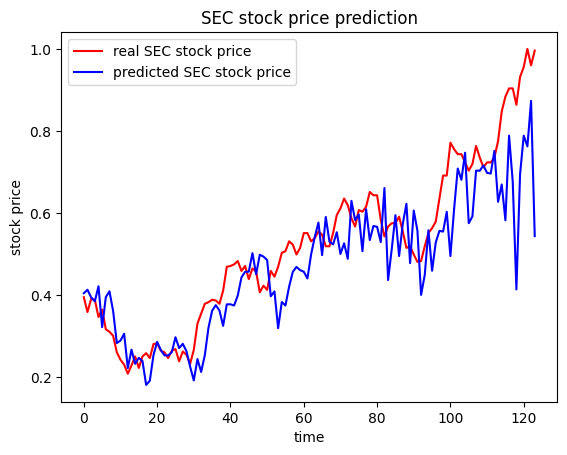

내일 SEC 주가 : [34013.383] KRW


In [ ]:
plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

print("내일 SEC 주가 :", df.Close[-1] * pred_y[-1] / dfy.Close[-1], 'KRW')